In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import logging

# Set up logging
logging.basicConfig(filename='project.log',
                    filemode='a',  # Append to the log file
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    level=logging.DEBUG)  # Set the logging level

logging.info("Starting the data loading process.")

# Load data
try:
    df = pd.read_csv('/content/UCI_Credit_Card.csv')
    logging.info("Data loaded successfully from '/content/UCI_Credit_Card.csv'.")

except FileNotFoundError as e:
    logging.error("File '/content/UCI_Credit_Card.csv' not found.")
    raise e
except pd.errors.EmptyDataError as e:
    logging.error("The file is empty.")
    raise e
except pd.errors.ParserError as e:
    logging.error("Parsing error while loading data.")
    raise e
except Exception as e:
    logging.error(f"An unexpected error occurred: {e}")
    raise e


In [5]:
# Display and log the first few rows of the data
try:
    head_data = df.head().to_string()
    logging.info("First five rows of the dataset:\n" + head_data)
    print(df.head())  # Displaying df.head() in the output as usual
except Exception as e:
    logging.error(f"Error displaying the first few rows of the dataset: {e}")
    raise e


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [6]:
# Logging for DataFrame info
try:
    logging.info(f"DataFrame Shape: {df.shape}")
    logging.info(f"DataFrame Columns and Data Types:\n{df.dtypes}")
    logging.info(f"Number of Missing Values:\n{df.isnull().sum()}")
    print(df.info())
except Exception as e:
    logging.error(f"Error retrieving DataFrame info: {e}")
    raise e


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
# logging for DataFrame summary statistics
try:
    description = df.describe().to_string()
    logging.info("DataFrame Summary Statistics:"+ description)
    print(df.describe())
except Exception as e:
    logging.error(f"Error displaying DataFrame summary statistics: {e}")
    raise e


                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [9]:
# Logging the count of duplicated rows
try:
    duplicate_count = df.duplicated().sum()
    logging.info(f"Number of duplicated rows: {duplicate_count}")
    print(duplicate_count)
except Exception as e:
    logging.error(f"Error checking for duplicated rows: {e}")
    raise e


0


In [10]:
# Logging the count of unique values per column
try:
    unique_counts = df.nunique().to_string()
    logging.info("Number of unique values per column:\n" + unique_counts)
    print(df.nunique())
except Exception as e:
    logging.error(f"Error calculating unique values per column: {e}")
    raise e


ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64


In [13]:
try:
    correlation_matrix = df.corr()
    logging.info("Correlation matrix calculated successfully.")
    logging.info(f"Correlation matrix:{correlation_matrix}")
    print(df.corr())
except Exception as e:
    logging.error(f"Error calculating correlation matrix: {e}")


                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

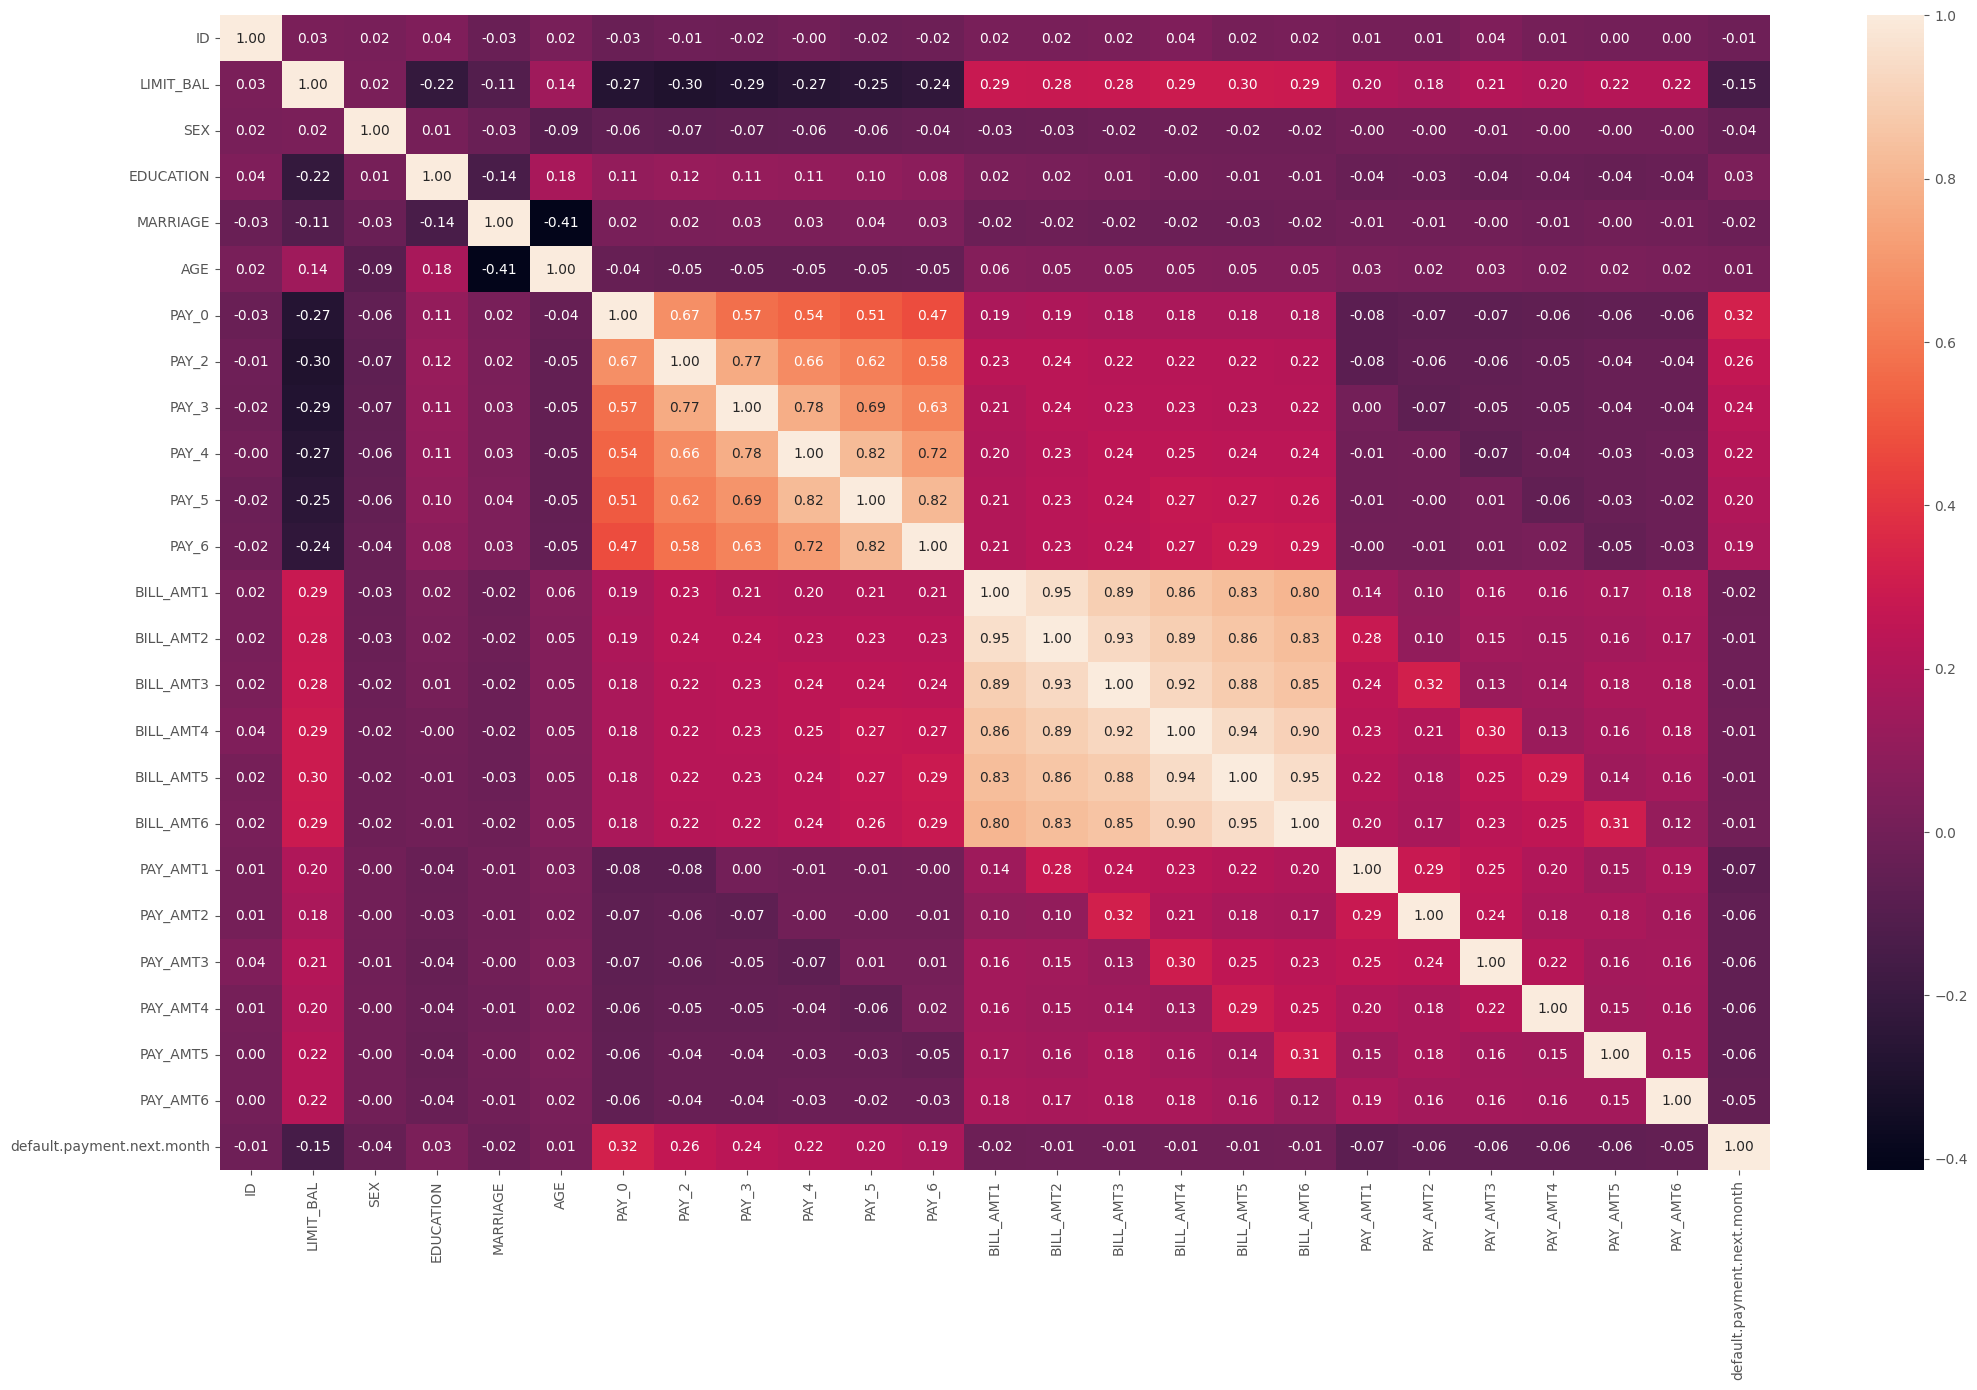

In [14]:
try:
    plt.figure(figsize=(25, 15))
    sns.heatmap(df.corr(), annot=True, fmt='.2f')
    plt.show()
    logging.info("Correlation heatmap displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying correlation heatmap: {e}")


In [16]:
try:
    Payment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    logging.info(f"Payment columns list created: {Payment_columns}")
    print(Payment_columns)
except Exception as e:
    logging.error(f"Error creating Payment columns list: {e}")


['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


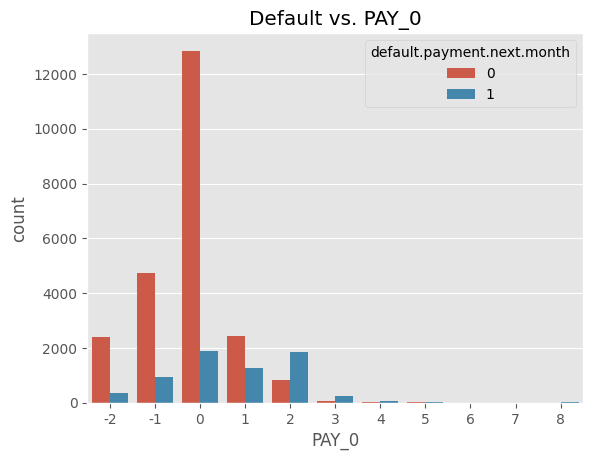

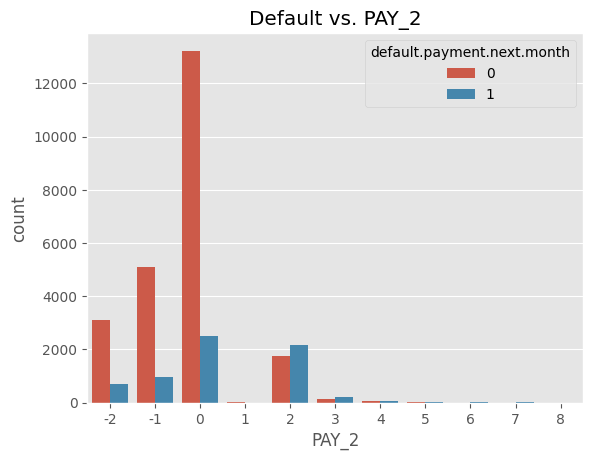

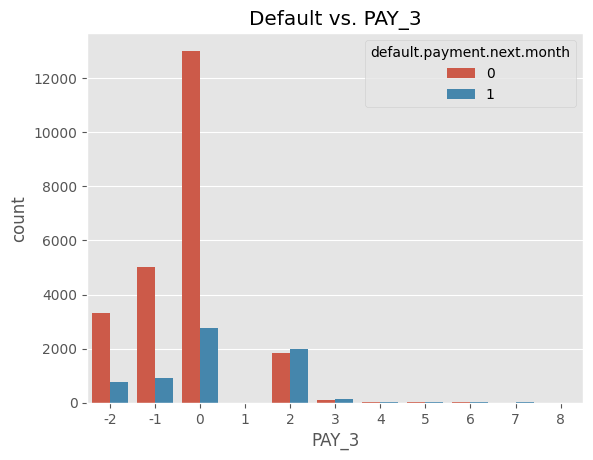

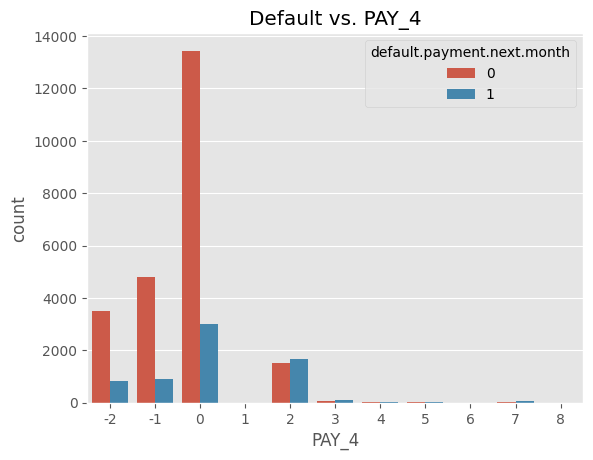

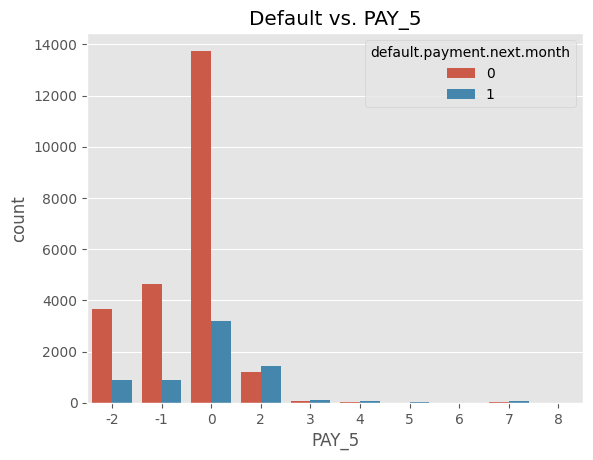

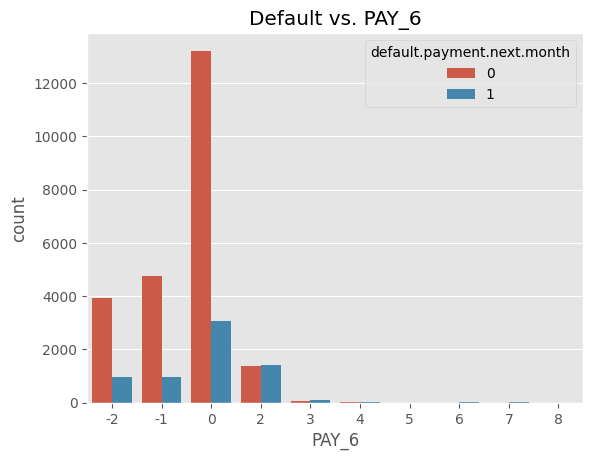

In [17]:
try:
    for col in Payment_columns:
        sns.countplot(x=col, hue='default.payment.next.month', data=df)
        plt.title(f'Default vs. {col}')
        plt.show()
        logging.info(f"Countplot for {col} displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying countplot for {col}: {e}")


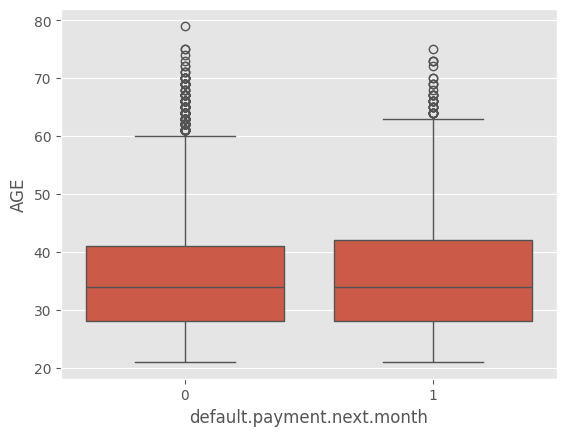

In [18]:
try:
    sns.boxplot(x='default.payment.next.month', y='AGE', data=df)
    plt.show()
    logging.info("Boxplot for AGE by default.payment.next.month displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying boxplot for AGE by default.payment.next.month: {e}")


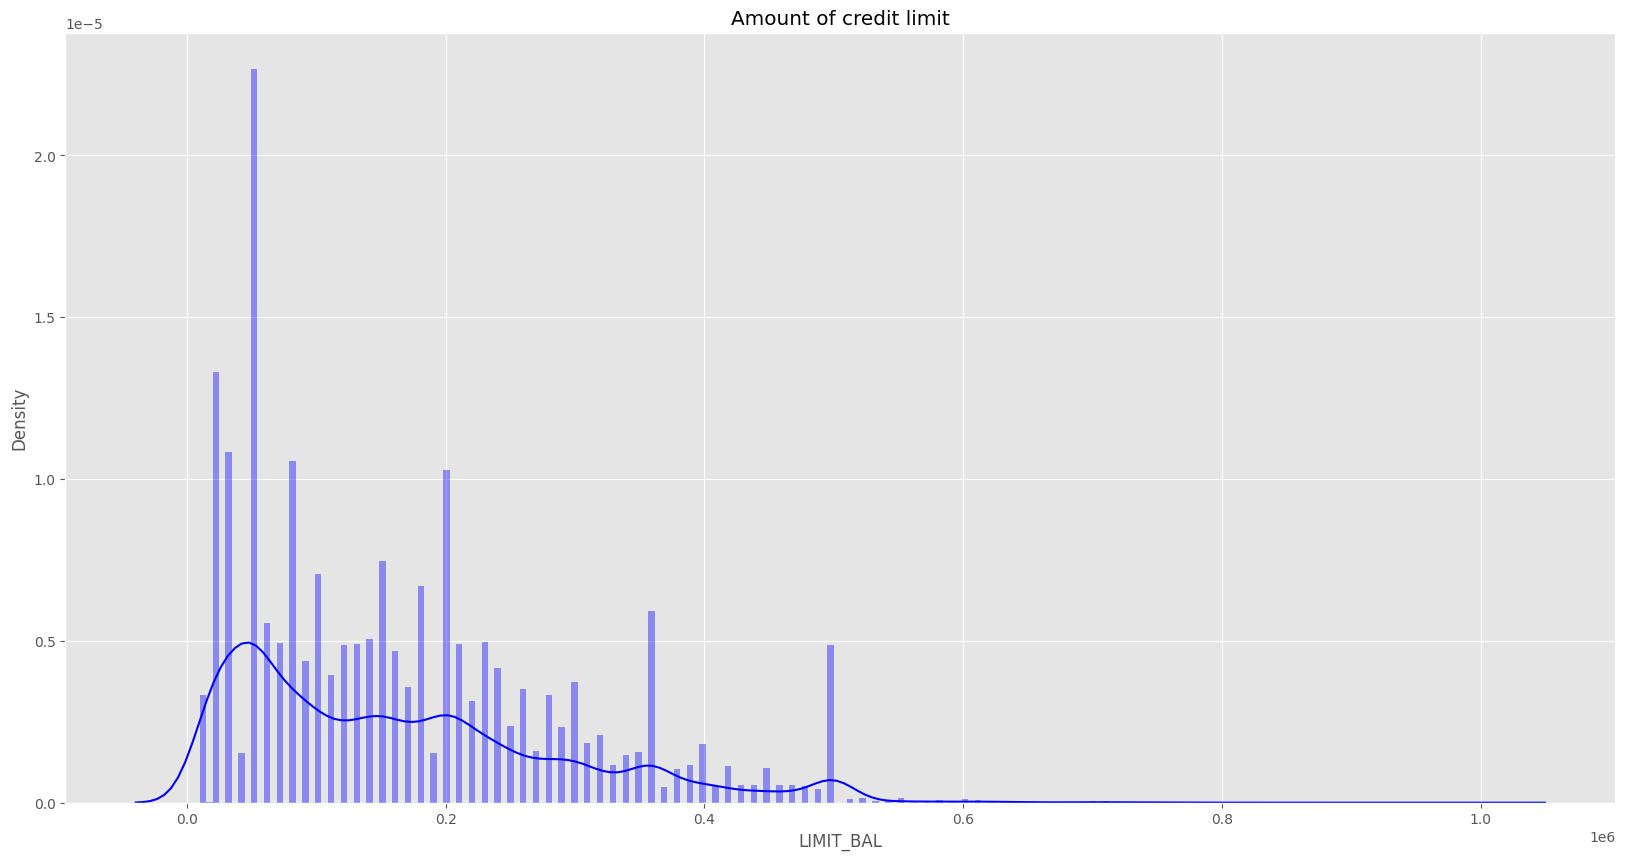

In [19]:
try:
    plt.figure(figsize=(20, 10))
    plt.title('Amount of credit limit')
    sns.distplot(df['LIMIT_BAL'], kde=True, bins=200, color='blue')
    plt.show()
    logging.info("Distribution plot for LIMIT_BAL displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying distribution plot for LIMIT_BAL: {e}")


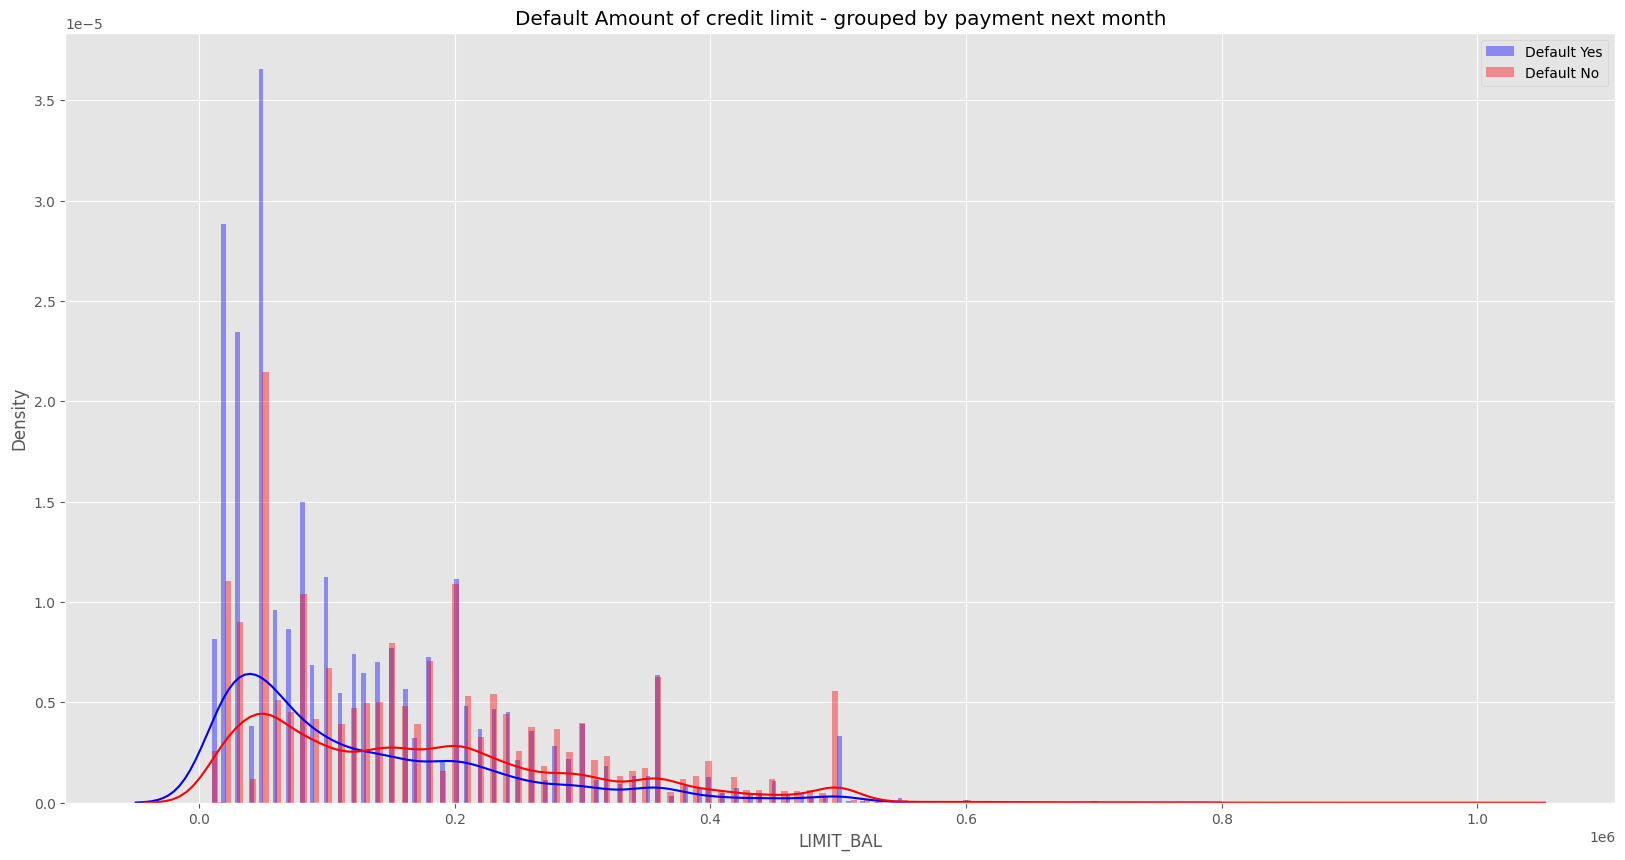

In [20]:
try:
    class_0 = df.loc[df['default.payment.next.month'] == 0]['LIMIT_BAL']
    class_1 = df.loc[df['default.payment.next.month'] == 1]['LIMIT_BAL']

    plt.figure(figsize=(20, 10))
    plt.title('Default Amount of credit limit - grouped by payment next month')
    sns.distplot(class_1, kde=True, bins=200, color='blue', label='Default Yes')
    sns.distplot(class_0, kde=True, bins=200, color='red', label='Default No')
    plt.legend()
    plt.show()
    logging.info("Distribution plot for LIMIT_BAL by default status displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying distribution plot for LIMIT_BAL by default status: {e}")


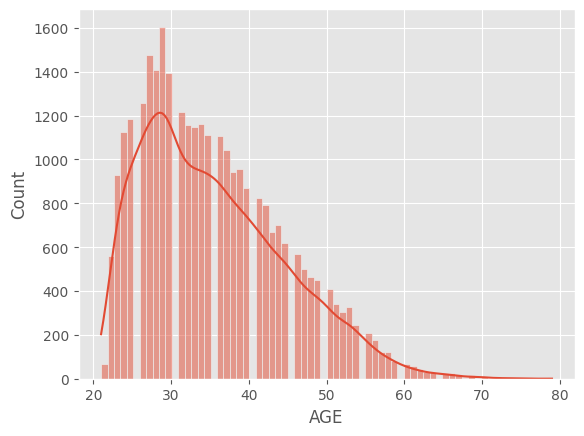

In [21]:
try:
    sns.histplot(df['AGE'], kde=True)
    plt.show()
    logging.info("Histogram for AGE displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying histogram for AGE: {e}")


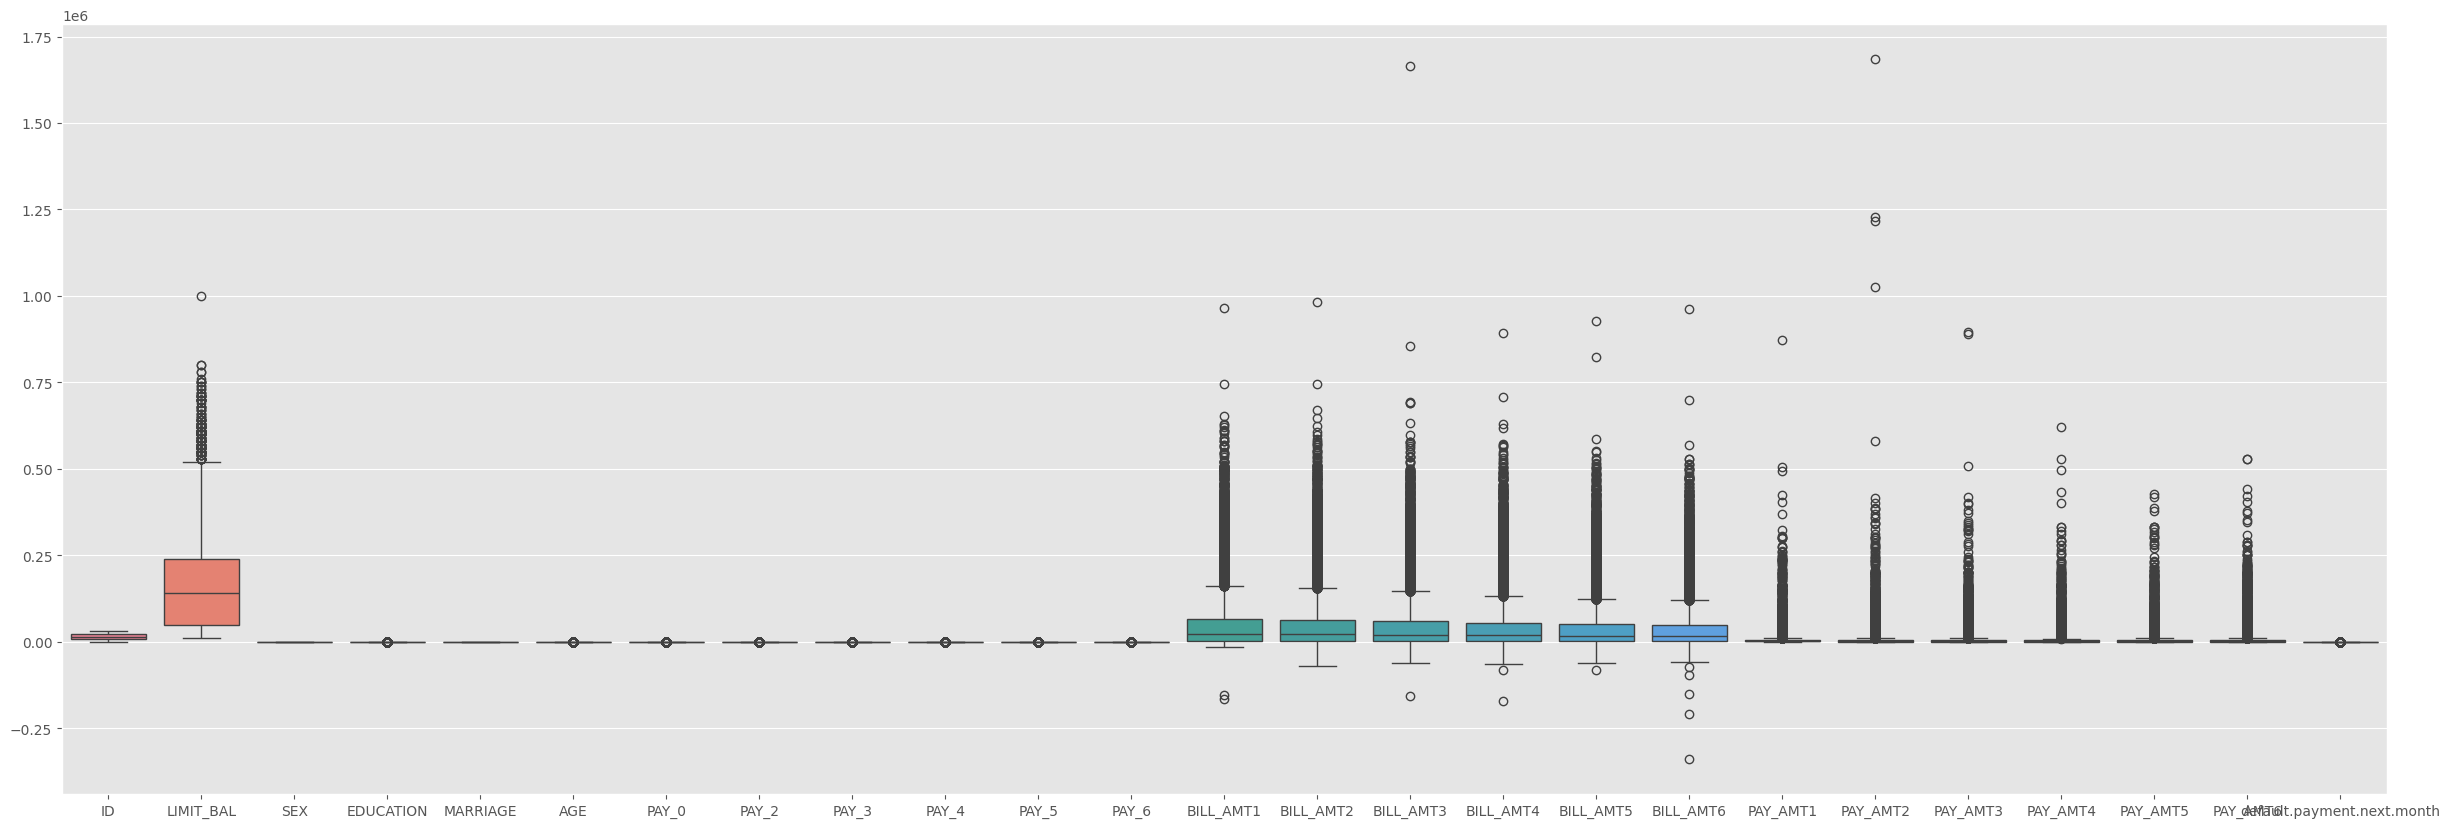

In [22]:
try:
    plt.figure(figsize=(30, 10))
    sns.boxplot(data=df)
    plt.show()
    logging.info("Boxplot for entire DataFrame displayed successfully.")
except Exception as e:
    logging.error(f"Error displaying boxplot for entire DataFrame: {e}")


In [19]:
# # Define a function to cap outliers
# def cap_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
#     df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# # Apply to each column with outliers
# for col in df.columns:
#     cap_outliers(df, col)


In [23]:
try:
    x = df.drop('default.payment.next.month', axis=1)
    y = df['default.payment.next.month']
    logging.info("Features and target variables separated successfully.")
except Exception as e:
    logging.error(f"Error separating features and target variables: {e}")


In [24]:
try:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    logging.info("Train-test split completed successfully.")
    logging.info(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
except Exception as e:
    logging.error(f"Error during train-test split: {e}")


In [25]:
try:
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    logging.info("Data scaling completed successfully.")
except Exception as e:
    logging.error(f"Error during data scaling: {e}")


In [22]:
x_train.shape

(24000, 24)

In [23]:
df.shape

(30000, 25)

In [24]:
y_train.shape

(24000,)

In [25]:
y_train.value_counts()

,count
default.payment.next.month,
0,18691
1,5309


In [26]:
# Machine learning model
from sklearn.linear_model import LogisticRegression
try:
    model = LogisticRegression()
    logging.info("Model set as LogisticRegression.")

    model.fit(x_train_scaled, y_train)
    y_pred= model.predict(x_test_scaled)
    logging.info("Model prediction completed successfully.")
except Exception as e:
    logging.error(f"Error during model training or prediction: {e}")

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
try:
    accuracy = accuracy_score(y_test, y_pred)
    logging.info(f"Accuracy score calculated successfully: {accuracy}")
    print(accuracy)
except Exception as e:
    logging.error(f"Error calculating accuracy score: {e}")


0.8098333333333333


In [29]:
try:
    report = classification_report(y_test, y_pred)
    logging.info(f"Classification report:\n{report}")
    print(report)
except Exception as e:
    logging.error(f"Error generating classification report: {e}")


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [31]:
try:
    features_importance = pd.Series(model.coef_[0], index=x.columns)
    features_importance = features_importance.abs().sort_values(ascending=False)
    logging.info("Feature importance calculated successfully.")
    logging.info(f"Feature importance:\n{features_importance}")
    print(features_importance)
except Exception as e:
    logging.error(f"Error calculating feature importance: {e}")


PAY_0        0.648927
BILL_AMT1    0.364427
PAY_AMT2     0.249030
PAY_AMT1     0.171731
BILL_AMT2    0.124868
BILL_AMT3    0.120718
PAY_2        0.109563
LIMIT_BAL    0.106723
MARRIAGE     0.079146
EDUCATION    0.077648
PAY_3        0.076874
AGE          0.076801
BILL_AMT4    0.058666
SEX          0.056061
PAY_AMT4     0.055289
PAY_4        0.052319
PAY_AMT6     0.047643
BILL_AMT5    0.032682
BILL_AMT6    0.028928
PAY_AMT3     0.024706
PAY_AMT5     0.023515
PAY_5        0.022418
PAY_6        0.014974
ID           0.004019
dtype: float64
